In [68]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.linear_model as smr

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

In [129]:
x = np.arange(0, 101, 10)
y = line(1, x, errors=errors)
error = errors(x)

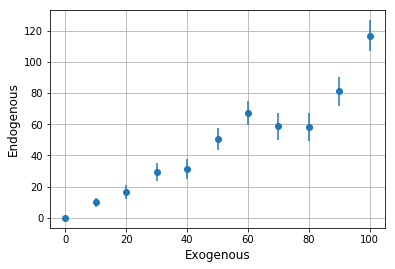

In [130]:
pl.errorbar(x, y, fmt='o', yerr=error)
pl.xlabel('Exogenous', fontsize=12)
pl.ylabel('Endogenous', fontsize=12)
pl.grid()

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [131]:
print("y: ",y)
print("x: ",x)
print("statsmodels.api.add_constant(): \n",sm.add_constant(x))

y:  [  0.           9.90616157  16.32682701  29.39874439  31.4828943
  50.78962099  67.2461037   58.58632946  57.99409358  81.09892618
 116.62507455]
x:  [  0  10  20  30  40  50  60  70  80  90 100]
statsmodels.api.add_constant(): 
 [[  1.   0.]
 [  1.  10.]
 [  1.  20.]
 [  1.  30.]
 [  1.  40.]
 [  1.  50.]
 [  1.  60.]
 [  1.  70.]
 [  1.  80.]
 [  1.  90.]
 [  1. 100.]]


# 3. use statsmodels.api.OLS to fit x and y

In [132]:
smfit = smf.OLS(y, x).fit()
smfit.summary()

/anaconda2/envs/pui2018/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     339.5
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.77e-09
Time:                        21:24:30   Log-Likelihood:                -40.620
No. Observations:                  11   AIC:                             83.24
Df Residuals:                      10   BIC:                             83.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9570      0.052     18.427      0.000       0.841       1.073
==============================================================================
Omnibus:                        2.326   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                0.491
Skew:                           0.462   Prob(JB):                        0.782
Kurtosis:                       3.466   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
smfit = smf.OLS(y, sm.add_constant(x)).fit()
smfit.summary()

/anaconda2/envs/pui2018/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     94.48
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.53e-06
Time:                        21:24:31   Log-Likelihood:                -40.539
No. Observations:                  11   AIC:                             85.08
Df Residuals:                       9   BIC:                             85.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1876      6.015     -0.364      0.724     -15.794      11.419
x1             0.9882      0.102      9.720      0.000       0.758       1.218
==============================================================================
Omnibus:                        1.118   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.055
Skew:                           0.142   Prob(JB):                        0.973
Kurtosis:                       3.200   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

In [134]:
smfit = smr.OLS(y, sm.add_constant(x)).fit()
beta0_sm, beta1_sm = smfit.params
print(beta0_sm)
print(beta1_sm)

-2.187593590183134
0.988215100412572


In [135]:
smfit2 = smr.OLS(y, x).fit()
beta1_sm2= smfit2.params
print(smfit2.params)

[0.95696376]


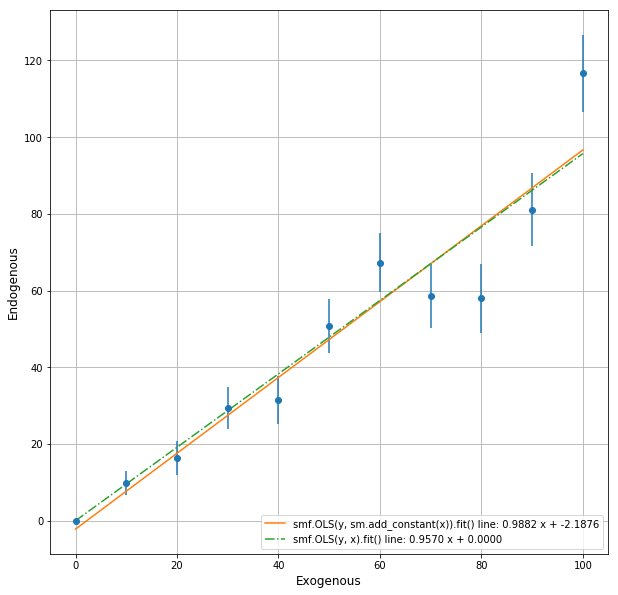

In [136]:
pl.figure(figsize=(10,10))
pl.errorbar(x, y, fmt='o', yerr=error)
pl.xlabel('Exogenous', fontsize=12)
pl.ylabel('Endogenous', fontsize=12)
pl.grid()
pl.plot(x, x * beta1_sm + beta0_sm, '-',
        label="smf.OLS(y, sm.add_constant(x)).fit() line: %.4f x + %.4f"\
       %(beta1_sm, beta0_sm))
pl.plot(x, x * beta1_sm2 + 0, '-.',
        label="smf.OLS(y, x).fit() line: %.4f x + %.4f"\
       %(beta1_sm2, 0))
pl.legend(loc='lower right')

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [109]:
x = np.arange(0, 101, 10)
slope = 1
y = line(slope, x, b=slope*100, errors=errors)
error = errors(x)

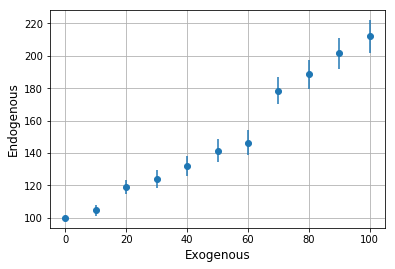

In [110]:
pl.errorbar(x, y, fmt='o', yerr=error)
pl.xlabel('Exogenous', fontsize=12)
pl.ylabel('Endogenous', fontsize=12)
pl.grid()

# 6. use statsmodels.api.OLS to fit x and y

In [111]:
smfit_bad = smf.OLS(y, x).fit()
smfit_bad.summary()

/anaconda2/envs/pui2018/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     87.39
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.94e-06
Time:                        21:10:44   Log-Likelihood:                -58.525
No. Observations:                  11   AIC:                             119.0
Df Residuals:                      10   BIC:                             119.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.4723      0.264      9.348      0.000       1.883       3.062
==============================================================================
Omnibus:                        1.080   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                0.753
Skew:                           0.294   Prob(JB):                        0.686
Kurtosis:                       1.861   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
smfit_good = smf.OLS(y, sm.add_constant(x)).fit()
smfit_good.summary()

/anaconda2/envs/pui2018/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     258.1
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           6.21e-08
Time:                        21:10:45   Log-Likelihood:                -36.802
No. Observations:                  11   AIC:                             77.60
Df Residuals:                       9   BIC:                             78.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.6666      4.282     21.407      0.000      81.980     101.353
x1             1.1628      0.072     16.064      0.000       0.999       1.326
==============================================================================
Omnibus:                        2.633   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.502
Skew:                          -0.886   Prob(JB):                        0.472
Kurtosis:                       2.633   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

In [120]:
weights = 1/(error+1) #the reason for adding +1 in the denominator is to avoid a division by 0

In [121]:
weights

array([1.        , 0.24025307, 0.182744  , 0.15438709, 0.13652706,
       0.12389934, 0.11433842, 0.10676232, 0.1005604 , 0.09535767,
       0.09090909])

In [125]:
wls_fit = sm.WLS(y,sm.add_constant(x), weights=weights).fit()

In [127]:
wls_fit.summary()

/anaconda2/envs/pui2018/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            WLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     305.5
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.97e-08
Time:                        21:18:16   Log-Likelihood:                -36.751
No. Observations:                  11   AIC:                             77.50
Df Residuals:                       9   BIC:                             78.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.2544      2.532     38.408      0.000      91.526     102.982
x1             1.0685      0.061     17.478      0.000       0.930       1.207
==============================================================================
Omnibus:                        2.545   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.078
Skew:                          -0.327   Prob(JB):                        0.583
Kurtosis:                       1.612   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""